In [7]:
import random
import torch
from d2l import torch as d2l


In [ ]:
# 3.2.1 生成数据集

def synthetic_data(w, b, num_examples):#@save
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.2004, -0.5739]) 
label: tensor([6.5607])


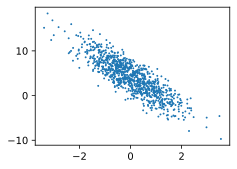

In [10]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(), 1)


In [11]:
#3.2.2 读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这里样本是随机读取的，没有特定次序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [12]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,"\n",y)
    break

tensor([[ 1.2946,  0.0326],
        [-0.0261,  1.4208],
        [ 0.2646,  0.2914],
        [ 0.1836, -2.4223],
        [ 1.7426,  0.2571],
        [-0.5651,  0.9580],
        [-0.0176, -0.7136],
        [ 1.3780,  0.0622],
        [-0.0222, -0.5711],
        [ 0.0144,  0.5497]]) 
 tensor([[ 6.6719],
        [-0.6823],
        [ 3.7530],
        [12.8147],
        [ 6.8116],
        [-0.1917],
        [ 6.5923],
        [ 6.7627],
        [ 6.1060],
        [ 2.3650]])


In [13]:
#3.2.3 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# 3.2.4 定义模型
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

# 3.2.5 定义损失函数
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# 3.2.6 定义优化算法
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [16]:
#3.2.7 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) # X和y的小批量损失
        l.sum().backward() # 小批量的梯度
        sgd([w,b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042539
epoch 2, loss 0.000159
epoch 3, loss 0.000049


In [17]:
print(f"w,b 的训练结果:{w},{b}")
print(f'w的估计误差为 {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差为 {true_b - b}')


w,b 的训练结果:tensor([[ 2.0001],
        [-3.3991]], requires_grad=True),tensor([4.1991], requires_grad=True)
w的估计误差为 tensor([-9.9182e-05, -8.8477e-04], grad_fn=<SubBackward0>)
b的估计误差为 tensor([0.0009], grad_fn=<RsubBackward1>)
